In [1]:
import numpy as np
import json
import os

import matplotlib.pyplot as plt

from neuron import h
from neuron.units import mV, ms

import sys
sys.path.insert(1, "../utils/")
import Stimuli, Pyr

In [2]:
duration = 10000

## read stimuli

In [3]:
path2stimulifile = '../data/morpho/nInputs_palmerscratch_stimuli/stim_times_0.json'

with open(path2stimulifile, 'r') as fin:
    stim_times = json.load(fin)

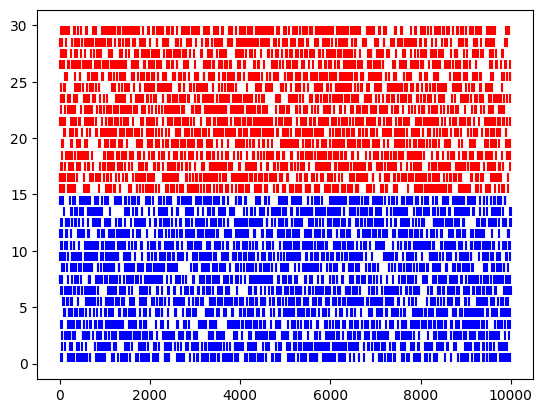

In [4]:
for stim_loc in stim_times:
    if int(stim_loc) >=15:
        stim_color = 'red'
    else:
        stim_color = 'blue'
    plt.vlines(stim_times[stim_loc], int(stim_loc) + 0.1, int(stim_loc) + .9, color = stim_color)

## read spikes

In [5]:
path2spikes = '../data/morpho/nInputs_palmerscratch_spikes/'

ns = np.arange(1,11)

seg_locIDs = list(set([file.split('_')[2] for file in os.listdir(path2spikes)]))
seg_locIDs

['ID70',
 'ID92',
 'ID84',
 'ID81',
 'ID87',
 'ID19',
 'ID71',
 'ID88',
 'ID99',
 'ID2',
 'ID90',
 'ID25',
 'ID69',
 'ID22',
 'ID55',
 'ID96',
 'ID48',
 'ID50',
 'ID36',
 'ID21']

In [6]:
spikes = {seg_locID:{} for seg_locID in seg_locIDs}

missing_files = []
for seg_locID in seg_locIDs:
    for n in ns:
        try:
            _spikes0 = np.load(f'{path2spikes}spikes_0_{seg_locID}_{n}.npy')
        except:
            _spikes0 = np.zeros(0)
            missing_files.append(f'spikes_0_{seg_locID}_{n}.npy')
        try:
            _spikes1 = np.load(f'{path2spikes}spikes_1_{seg_locID}_{n}.npy')
            spikes[seg_locID][n] = _spikes1
        except:
            _spikes1 = np.zeros(0)
            missing_files.append(f'spikes_1_{seg_locID}_{n}.npy')

ID88


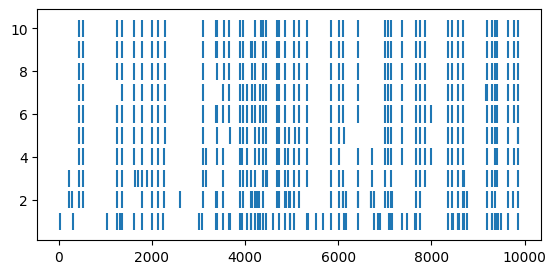

In [18]:
seg_locID = seg_locIDs[7]
print(seg_locID)

ns = np.arange(1,11)

fig, axes = plt.subplots(1, 1, figsize = (6.5, 3))

for n in ns:
    axes.vlines(spikes[seg_locID][n], n-.4, n+.4)

## generate ground truth responses

In [8]:
cells = {seg_locID : Pyr.Pyr() for seg_locID in ['ID21']}
stimuli = {}

seg_locID = 'ID21'

path2segarrays = '../data/morpho/segment_arrays/'
seg_loc_file = [file for file in os.listdir(path2segarrays) if seg_locID+'.npy' in file][0]
print(seg_loc_file)

stim_params = Stimuli.ExperimentalStimParams()
stim_scaffold = stim_params.stim_scaffold['pyr']
stim_locs = np.load(f'{path2segarrays}{seg_loc_file}')

# generate the stimuli
stimuli[seg_locID] = Stimuli.MorphoStimuli(
    seg_locID, 
    stim_params.stim_scaffold['pyr']['stim_type_array'],
    stim_locs,
    stim_scaffold,
    duration
)

# set the stimuli times
for i, stimulus in enumerate(stimuli[seg_locID].stimuli):
    stimulus.event_times = stim_times[str(i)]
    
cells[seg_locID].add_stimuli(stimuli[seg_locID])

segment_array_1.6Hz_ID21.npy


In [9]:
h.celsius = 35
h.finitialize()
h.continuerun(duration * ms)

0.0

In [10]:
list(cells['ID21'].spike_times)

[255.000000000005,
 741.3500000006056,
 1137.3500000020463,
 1616.950000003791,
 2279.4250000019915,
 4914.549999963646,
 5251.0249999587495,
 5548.224999954425,
 6108.124999946277,
 6454.799999941232,
 7160.5999999309615,
 7784.124999921888,
 7975.824999919098,
 8240.74999991879,
 8655.974999942959,
 9072.924999967228,
 9391.12499998575,
 9484.474999991184,
 9773.150000007987,
 9870.325000013643,
 9983.800000020248]

ID21


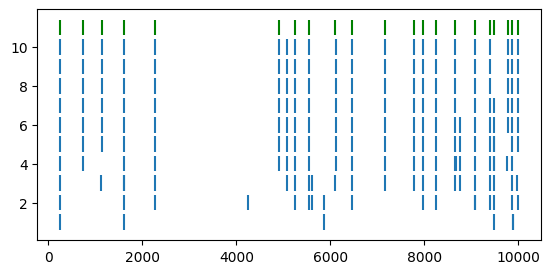

In [13]:
seg_locID = 'ID21'
print(seg_locID)

ns = np.arange(1,11)

fig, axes = plt.subplots(1, 1, figsize = (6.5, 3))

for n in ns:
    axes.vlines(spikes[seg_locID][n], n-.4, n+.4)
    
axes.vlines(list(cells['ID21'].spike_times), 11-.4, 11+.4, color='green')